# Loading the Datasets

In [37]:
from Model import *
import torch.nn as nn
from torch.utils.data import DataLoader
import pandas as pd

#get the data
split_ratio = 0.8
val_ratio = 0.2
data = pd.read_csv("Data/dataset_2048_large.csv", dtype = str)
train_df = data.sample(frac = split_ratio)
test_df = data.drop(train_df.index)
val_df = train_df.sample(frac = val_ratio)
train_df = train_df.drop(val_df.index)

train_dataset = QueueDataset(train_df)
test_dataset = QueueDataset(test_df)
val_dataset = QueueDataset(val_df)

#initialize the data loader 
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 128, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 128, shuffle = True)

# Defining the Model

In [46]:
#model hyperparameters 
ntokens = 65536  # size of vocabulary
emsize = 768  # embedding dimension
d_hid = 768  # dimension of the feedforward network model in ``nn.TransformerEncoder``
nlayers = 4  # number of ``nn.TransformerEncoderLayer`` in ``nn.TransformerEncoder``
nhead = 8 # number of heads in ``nn.MultiheadAttention``
dropout = 0.2  # dropout probability
input_size = 128
threshold = 0.5

#define the model 
device = "cpu"
transformer = RandomLM(ntokens, emsize, nhead, d_hid, nlayers, input_size, dropout).to(device)
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.Adam(transformer.parameters())

/Users/rishabhgoel/Environments/Randomness_Testing/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Training Model

In [45]:
save = True 
path = str(emsize) + "embeddings-" + str(nlayers) + "encoder-" + str(nhead) + "heads-" + str(input_size) + "tokensize"

train_metrics, val_metrics = train(transformer, criterion, optimizer, train_loader, val_loader, 3 threshold)
plot_metrics(train_metrics, val_metrics)
inference(transformer, criterion, test_loader, threshold)
model_save(transformer, path, train_metrics, val_metrics)

KeyboardInterrupt: 

# Pre-Trained Models

## Metrics

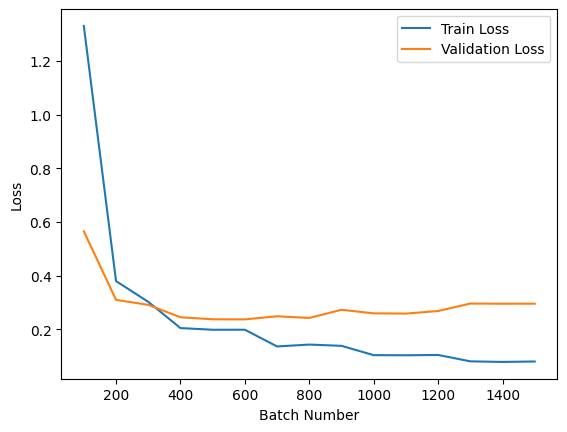

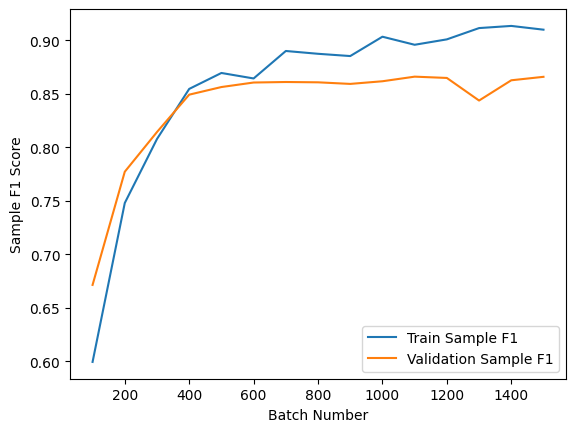

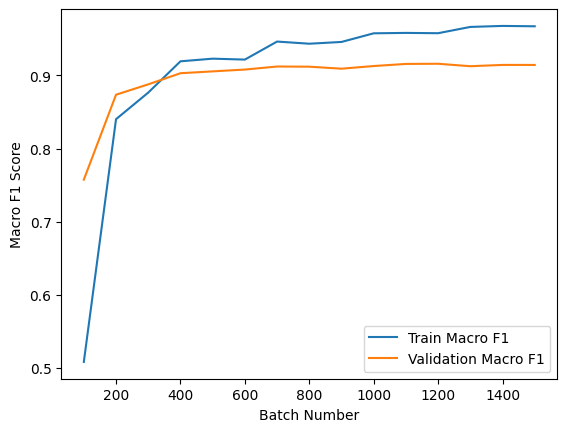

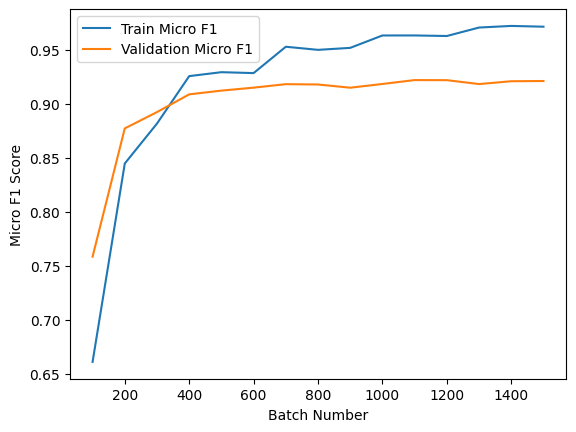

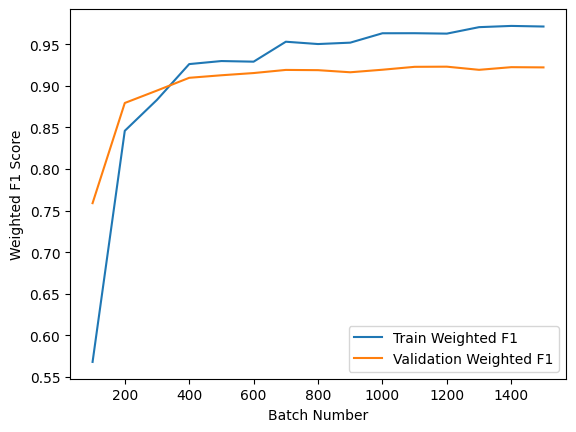

In [38]:
path = "TrainedModels/240embeddings-3encoder-8heads-128tokensize"

with ZipFile(path + ".zip", "r") as myzip:
    myzip.extractall("temp/")

train_metrics = pd.read_csv("temp/train_metrics.csv", index_col = 0)
val_metrics = pd.read_csv("temp/val_metrics.csv", index_col = 0)

plot_metrics(train_metrics, val_metrics)
#inference(transformer, criterion, test_loader, 0.5)

## Inference

In [ ]:
model = torch.load("temp/model.pth")

data_loader = None #loader for the data
inference(model, criterion, test_loader, threshold)

In [36]:
os.remove("temp/train_metrics.csv")
os.remove("temp/val_metrics.csv")
if (os.path.exists("temp/model.pth")):
    os.remove("temp/model.pth")
if (os.path.exists("temp/model.pt")):
    os.remove("temp/model.pt")
os.rmdir("temp")

OSError: [Errno 66] Directory not empty: 'temp'